
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# Análisis exploratorio de datos (Python)

## Introducción 
El presente análisis habla sobre Zuber, una nueva empresa de viajes compartidos lanzada en Chicago, cuyo enfoque es encontrar patrones en los datos de los viajes realizados por los usuarios. 

El transporte es una actividad importante para la economía, por lo cual vale la pena investigar los patrones en los viajes.


Para realizar este análisis es necesario aplicar los conocimientos adquiridos en el sprint 7, como lo son la recuperación de datos de recursos en línea, SQL y relaciones entre tablas. Así como hacer uso de los conocimientos adquiridos en sprints anteriores, que son el uso de la estadística para comprobar hipótesis y la representación de datos. 


Con este análisis se pretende encontrar cómo influyen las condiciones climáticas en la duración de los viajes, saber la cantidad de viajes realizados por cada compañía en determinadas fechas, así como conocer los barrios principales donde finalizan los viajes.


## Objectivo 
Encontrar patrones de viaje para comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>


Clara, excelente trabajo agregando una introducción al proyecto donde se especifiquen claramente los objetivos y se explique el propósito del mismo. Es esencial hacer esto para establecer las bases del proyecto y aclarar lo que buscamos alcanzar. Con la introducción, queda de manera clarar el análisis que desarrollaremos en el proyecto y cómo lo pretendemos abordar.</div>

### 1. Importar los archivos

In [23]:
# Importación de librerias
import pandas as pd
from pandas import pivot_table
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import levene

In [54]:
# Lectura del dataframe
df_result_01 = pd.read_csv(
    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 7/Proyeto_Sprint7/moved_project_sql_result_01.csv")
df_result_04 = pd.read_csv(
    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 7/Proyeto_Sprint7/moved_project_sql_result_04.csv")
df_result_07 = pd.read_csv(
    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 7/Proyeto_Sprint7/moved_project_sql_result_07.csv")


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

### 2. Estudiar los datos que contienen

In [6]:
# Mostrar información del dataframe games
df_result_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
# Mostrar información del dataframe games
df_result_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [55]:
# Impresión de muestra del dataframe
df_result_01.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [42]:
# Impresión de muestra del dataframe
df_result_04.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [49]:
# Revisión de datos duplicados
print(df_result_01.duplicated().sum())
print(df_result_04.duplicated().sum())


0
0


En esta parte se puede observar que ambos dataframes tienen los tipos de datos correctos por lo cual no es necesario hacer algún cambio.
También se puede observar que no existen valores duplicados para ninguno de los dos.


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el análisis de registros duplicados!.</div>

### 4. Identificar los 10 principales barrios en términos de finalización del recorrido

In [10]:
# Impresión de muestra del dataframe
df_result_04.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### 5. Hacer gráficos: empresas de taxis y número de viajes

<Axes: title={'center': 'Trips_amount by company between 15 and 16 Nov 2017'}, xlabel='company_name', ylabel='trips_amount'>

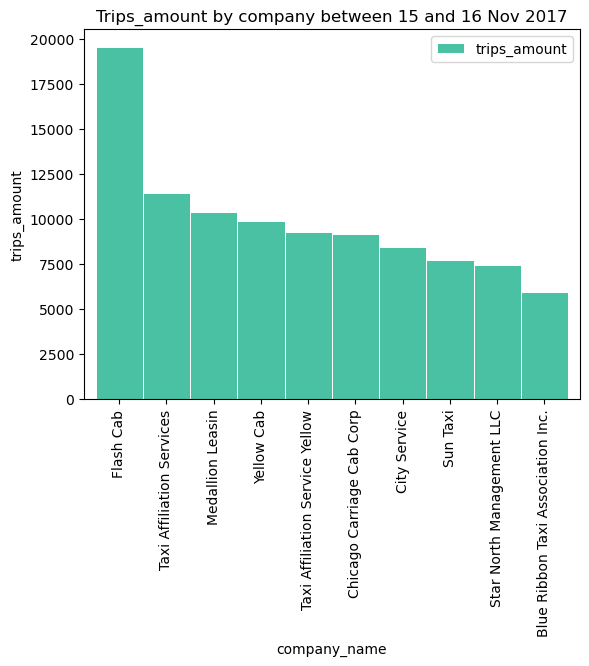

In [52]:
df_result_01.head(10).plot(kind='bar', x='company_name', y='trips_amount',
                           title='Trips_amount by company between 15 and 16 Nov 2017',
                           xlabel='company_name', ylabel='trips_amount',
                           width=1, edgecolor="white", linewidth=0.7, color='#4AC1A2')

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis, muestras de manera clara cuales son los 10 principales barrios en términos de finalización del recorrido
    </div>

### 6. Hacer gráficos: los 10 barrios principales por número de finalizaciones

<Axes: title={'center': 'Dropoff_location_name in Chicago in Nov 2017'}, xlabel='Dropoff_location_name', ylabel='average_trips'>

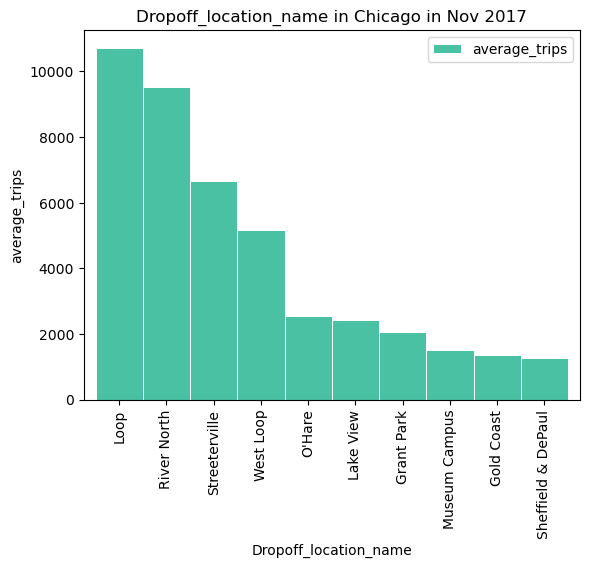

In [12]:
df_result_04.head(10).plot(kind='bar', x='dropoff_location_name', y='average_trips',
                           title='Dropoff_location_name in Chicago in Nov 2017',
                           xlabel='Dropoff_location_name', ylabel='average_trips', 
                           width=1, edgecolor="white", linewidth=0.7, color='#4AC1A2')

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>
    

###  7. Conclusiones basadas en cada gráfico y explicar los resultados

De la elaboración de gráficas de la cantidad de viajes y de los barrios donde más finalizan los viajes de los pasajeros, se han obtenido los siguientes conclusiones:

Flash cab supera por más de 8000 a Taxi Affiliation Services, mientras que las siguientes compañías se mantienen casi en los mismos rangos, durante el 15 y 16 de Nov del 2017 los pasajeros prefirieron Flash cab para hacer sus viajes. 

Por otro lado el barrio de Loop resultó ser el lugar donde más viajes se finalizan los pasajeros seguido de River North durante Noviembre del 2017.


## Prueba de hipótesis

Las hipótesis se formularon en base a un parámetro de distribución que en este caso es la media de dos poblaciones estadísticas, en este caso la duración promedio en segundos de los viajes desde el barrio Loop hasta el aeropuerto de O'Hare. La hipótesis nula para expresar que no existen diferencias entre las poblaciones, en otras palabras para afirmar que los valores obtenidos están dentro del rango esperado, para este caso la duración promedio de los viajes de los pasajeros. La hipótesis alternativa se formuló en base a la hipótesis nula para comprobar lo contrario, es decir que pudieran existir valores fuera del rango. También se usa la prueba Levene como complemento para mostrar si las varianzas son iguales y de esta manera saber cual es valor correcto para "equal_var" dentro de la función "st.ttest_ind".

Para probar cual de las dos hipótesis es verdadera se utilizara la hipótesis sobre la igualdad de las medias de dos poblaciones, que sirve para comparar las medias de dos poblaciones. En este caso es la duración promedio de los viajes desde Loop hasta el aeropuerto de O'Hare.

Para el valor se establecerá en 5% porque los valores de umbral convencional son de 5% y 1%.


Prueba la hipótesis:

Hipótesis alternativa: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Hipótesis nula: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos".

In [73]:
# Se obtienen por separado los datos de los días con mal y buen clima
weather_bad = df_result_07.query("weather_conditions == 'Bad'")[['duration_seconds']]
weather_good = df_result_07.query("weather_conditions == 'Good'")[['duration_seconds']]

# Se usa la prueba de levene para mostrar si las varianzas son iguales
stat, p_value = levene(weather_bad, weather_good)
print(f"Lavene's test statistic: {stat}")
print(f"P-value: {p_value}")

# Se hace el calculo de las varainzas para cada condición del clima: Bad y Good
var_weather_bad = np.var(weather_bad, axis=0)
var_weather_good = np.var(weather_good, axis=0)
print('\nVarianza para condiciones con buen clima: ', var_weather_bad)
print('Varianza para condiciones con mal clima: ', var_weather_good)

# Se establace valor alphe así porque son los valores de umbral convencionales son 5% y 1%.
alpha = 0.05

# Comprobación de la hipótesis 
results_weather = st.ttest_ind(weather_bad, weather_good, equal_var=True)
if (results_weather.pvalue < alpha):# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("\nRechazamos la hipótesis nula")
else:
    print("\nNo podemos rechazar la hipótesis nula")

Lavene's test statistic: [0.3885349]
P-value: [0.53320387]

Varianza para condiciones con buen clima:  duration_seconds    517403.563302
dtype: float64
Varianza para condiciones con mal clima:  duration_seconds    575732.93085
dtype: float64

Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo!! Es importante mostrar si se cumplen los supuestos cuandor realizamos pruebas de hipótesis.
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Realizaste de manera perfecta la prueba de hipótesis. 
</div>

Dado que el resultado de p-value en levene es más mayor que 0.05 entonces esto significa que las varianzas no son significativamente diferentes una de la otra. Lo cual se puede comprobar con el cálculo de las varianzas que se realizó.El valor de la estadística resultó de 0.38, esto indica nuevamente que no hay una gran diferencia en las varianzas.

El resultado de los cálculos demuestra que se rechaza la hipótesis nula, lo cual indica que si hay una diferencia en las duración promedio de los viajes durante los días lluviosos o con tormenta, esto tiene sentido ya que el mal clima dificulta conducir. 


## Conclusiones

Según los datos expuestos, se concluye que conocer herramientas como SQL, relaciones entre tablas y recuperación de datos es posible profundizar aún más en el análisis de datos, conocer y usar estas herramientas me ha permitido ampliar mis conocimientos, aunque me ha resultado retador poner en práctica estos nuevos conocimientos quiero seguir aprendiendo y practicando para seguir mejorando.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:

    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    

    
*  Profundizar en los resultados intermedios y en la conclusión final.
    
</div>